# Intensity Analysis

This notebook selects and compares pixel intensities from various scanning transmission electron microscope (STEM) images. The masks were generated by classifying the raw images using Fiji's Trainable Weka Segmentation plugin.

Analysis by Ondrej Dyck

Image acquisition by Ondrej Dyck

Sample preparation by Aisha Okmi

In [1]:
# import the packages we will need
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image

# Figure 1

First we will import our images

In [31]:
image_name = 'Data/SuperScan (MAADForABF) cropped.tif'
mask_name = 'Data/Classified image.tif'

image_name2 = 'Data/SuperScan (MAADForABF) 3 cropped.tif'
mask_name2 = 'Data/Classified image2.tif'
in_out_mask_name = 'Data/Mask2.tif'

image = np.array(Image.open(image_name))
mask = np.array(Image.open(mask_name))
image2 = np.array(Image.open(image_name2))
mask2 = np.array(Image.open(mask_name2))
io_mask = np.array(np.array(Image.open(in_out_mask_name))/255, dtype=int)

Show the images to see what we are working with

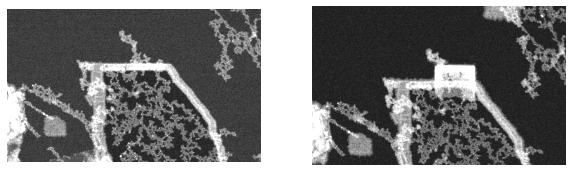

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), facecolor='white')
immin = np.min(image)
immax = np.max(image)/2

ax[0].imshow(image, vmin=immin, vmax=immax, cmap='gray')
ax[0].set_axis_off()
ax[1].imshow(image2, vmin=immin, vmax=immax, cmap='gray')
ax[1].set_axis_off()

#plt.savefig('image_comparison.svg', bbox_inches='tight')
#plt.savefig('image_comparison.png', bbox_inches='tight', dpi=200)
plt.show()

Let's look at the masks we will be using to segment the different regions of the images.

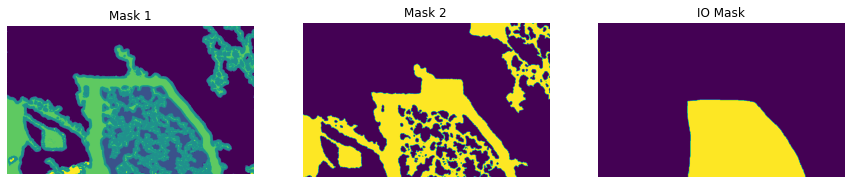

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), facecolor='white')
ax[0].imshow(mask)
ax[0].set_title('Mask 1')
ax[0].set_axis_off()

ax[1].imshow(mask2)
ax[1].set_title('Mask 2')
ax[1].set_axis_off()

ax[2].imshow(io_mask)
ax[2].set_title('IO Mask')
ax[2].set_axis_off()

plt.show()


Mask 1 distinguishes between a few features of different intensity. Mask 2 distinguishes between graphene and not graphene. IO Mask distinguishes between what is inside vs outside of the barrier.

In [5]:
# This is probably an overly complicated way of going about this

# create a dataframe that contains all the pixel values and the assigned categories
df = pd.DataFrame({'intensity':image.flat, 'category':mask.flat})

# Select only categories zero and one, which correspond to graphene outside and inside of the barrier
data = df[df['category']<2]

# assign the proper labels
data['image'] = np.where(data['category']==0, 'I1: open', 'I1: enclosed')

# create another dataframe for the other image
df2 = pd.DataFrame({'intensity': image2.flat, 'category':mask2.flat, 'io':io_mask.flat})

# select only the graphene
data2 = df2[df2['category']==0]

# Assign labels based on the IO Mask to determine whether the graphene is inside or outside the barrier
data2['image'] = np.where(data2['io']==0, 'I2: open', 'I2: enclosed')
data2.drop(columns=['io'], inplace=True)

# put these dataframes together
data = pd.concat([data, data2])
data

/tmp/ipykernel_27000/4030004776.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = np.where(data['category']==0, 'I1: open', 'I1: enclosed')
/tmp/ipykernel_27000/4030004776.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['image'] = np.where(data2['io']==0, 'I2: open', 'I2: enclosed')
/tmp/ipykernel_27000/4030004776.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

,intensity,category,image
0,0.106201,0,I1: open
1,0.053351,0,I1: open
2,0.075963,0,I1: open
3,0.131255,0,I1: open
4,0.117676,0,I1: open
...,...,...,...
615655,0.074323,0,I2: open
615656,0.062012,0,I2: open
615657,0.036772,0,I2: open
615658,0.034296,0,I2: open


Plot the intensities for each region

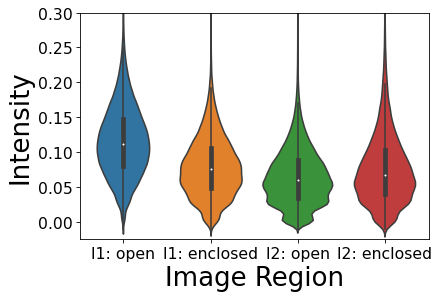

In [6]:
fig, ax = plt.subplots(1,1, figsize=(6,4), dpi=75, facecolor='white')
sns.violinplot(data=data, x='image', y='intensity', ax=ax)
ax.set_ylim(-0.025, 0.3)
ax.set_xlabel('Image Region', fontsize=25)
ax.set_ylabel('Intensity', fontsize=25)
ax.tick_params(axis='both', labelsize=15)
plt.savefig('Output/violin_plot_intensity_comparison.svg', bbox_inches='tight')
plt.savefig('Output/violin_plot_intensity_comparison.png', bbox_inches='tight', dpi=200)
plt.show()

# Figure 2

## Image 1

Import the image and mask we will use

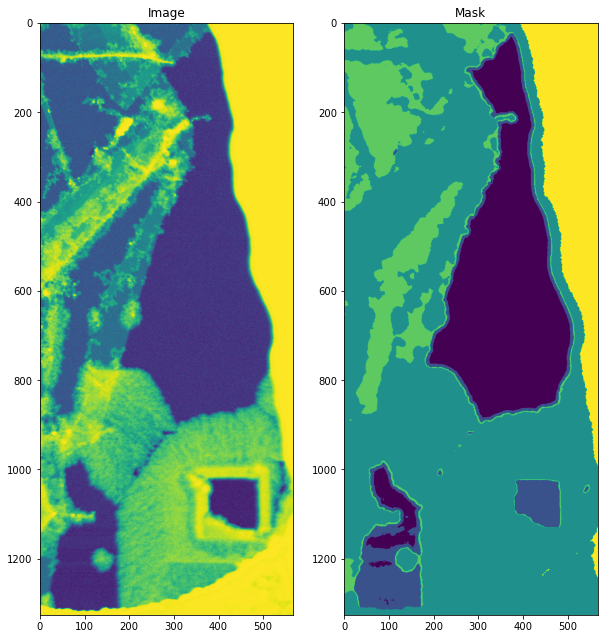

In [7]:
fname = 'Data/SuperScan (MAADForABF) 10_no-gamma_cropped.tif'
mask_name = 'Data/SuperScan (MAADForABF) 10_no-gamma_cropped_classified.tif'

image = np.array(Image.open(fname))
mask = np.array(Image.open(mask_name))

# plot the pair
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,20), facecolor='white')
ax[0].imshow(image)
ax[0].set_title('Image')
ax[1].imshow(mask)
ax[1].set_title('Mask')

plt.show()

We want to use the mask to select regions from the image. Let's crop some regions to narrow down our selection area.

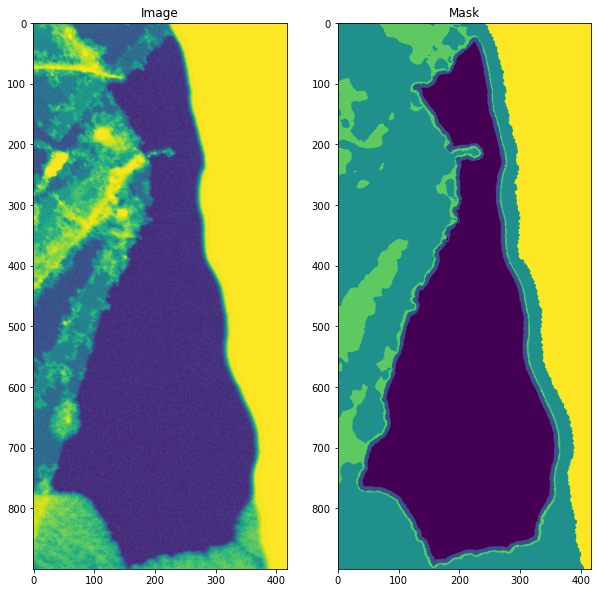

In [8]:
# crop to this y-value
y = 900

# crop to this x-value
x = 150
cropped_image = image[:y,x:]
cropped_mask = mask[:y,x:]

# plot the pair
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,20), facecolor='white')
ax[0].imshow(cropped_image)
ax[0].set_title('Image')
ax[1].imshow(cropped_mask)
ax[1].set_title('Mask')

plt.show()

Now we want to select the pixels from the image based on the minimum mask value (the dark area).

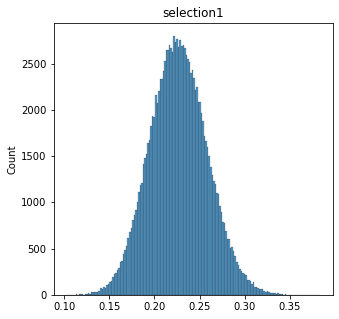

In [9]:
selection1 = cropped_image[cropped_mask == 0]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), facecolor='white')
sns.histplot(selection1, ax=ax)
ax.set_title('selection1')
plt.show()

This is just a histogram of the intensities within that region.

Now let's select another region.

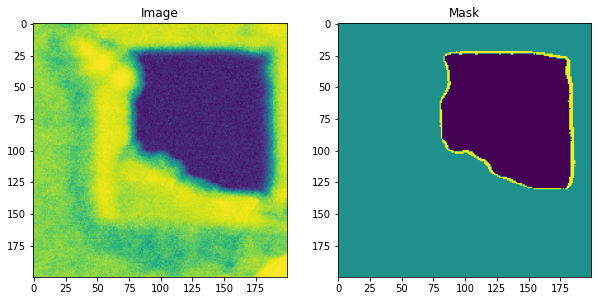

In [10]:
# crop to this y-value
y1 = 1000
y2 = 1200

# crop to this x-value
x1 = 300
x2 = 500

cropped_image = image[y1:y2,x1:x2]
cropped_mask = mask[y1:y2,x1:x2]

# plot the pair
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,20), facecolor='white')
ax[0].imshow(cropped_image)
ax[0].set_title('Image')
ax[1].imshow(cropped_mask)
ax[1].set_title('Mask')

plt.show()

Select the image pixels from the dark region.

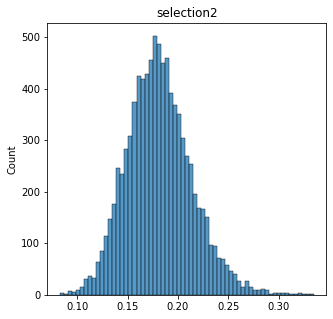

In [11]:
selection2 = cropped_image[cropped_mask == 1]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), facecolor='white')
sns.histplot(selection2, ax=ax)
ax.set_title('selection2')
plt.show()

Get another selection

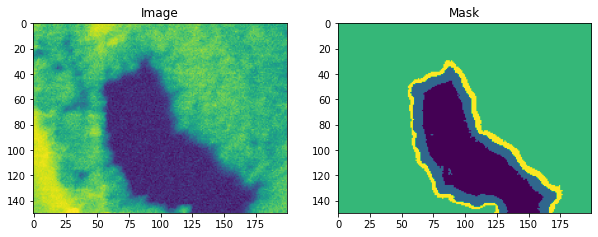

In [12]:
# crop to this y-value
y1 = 950
y2 = 1100

# crop to this x-value
x1 = 0
x2 = 200

cropped_image = image[y1:y2,x1:x2]
cropped_mask = mask[y1:y2,x1:x2]

# plot the pair
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,20), facecolor='white')
ax[0].imshow(cropped_image)
ax[0].set_title('Image')
ax[1].imshow(cropped_mask)
ax[1].set_title('Mask')

plt.show()

Select the pixels

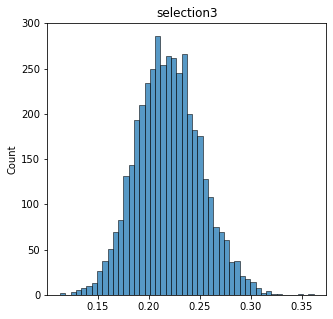

In [13]:
selection3 = cropped_image[cropped_mask == 0]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), facecolor='white')
sns.histplot(selection3, ax=ax)
ax.set_title('selection3')
plt.show()

Plot these intensities together. Because the number of pixels is different between the different selections, we want to use a density plot instead of a regular histogram so that the height of each distribution is approximately the same.

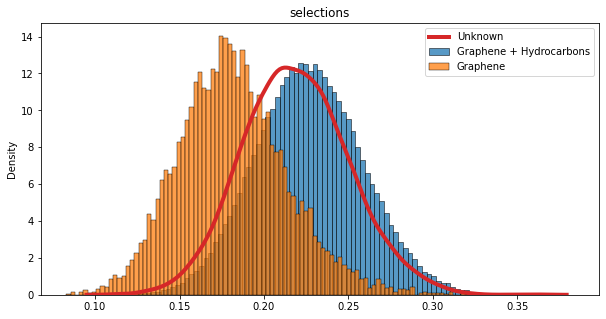

In [14]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5), facecolor='white')
palette = sns.color_palette()
sns.histplot(selection1, ax=ax, color=palette[0], label='Graphene + Hydrocarbons', stat='density', bins=100)
sns.histplot(selection2, ax=ax, color=palette[1], label='Graphene', stat='density', bins=100)
#sns.histplot(selection3, ax=ax, color=palette[2], label='Unknown', stat='density', bins=100, kde=True)
sns.kdeplot(selection3, ax=ax, color=palette[3], label='Unknown', linewidth=4) # The line looks cleaner 
ax.set_title('selections')
ax.legend()
plt.show()

Now we want to create a line profile

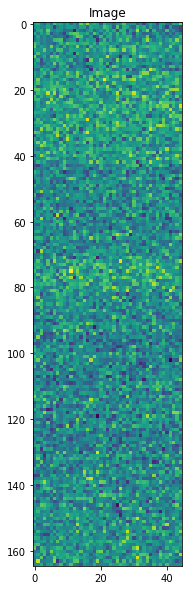

In [15]:
# crop to this y-value
y1 = 1135
y2 = 1300

# crop to this x-value
x1 = 65
x2 = 110

cropped_image = image[y1:y2,x1:x2]
cropped_mask = mask[y1:y2,x1:x2]

# plot the pair
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,10), facecolor='white')
ax.imshow(cropped_image)
ax.set_title('Image')

plt.show()

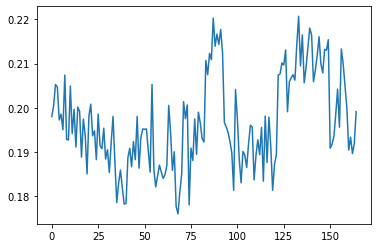

In [16]:
line = np.mean(cropped_image, axis=1)
# we are going to want this reversed
line = line[::-1]
plt.plot(line)
plt.show()

Now, plot both the density plots and the line profile together on the same axis

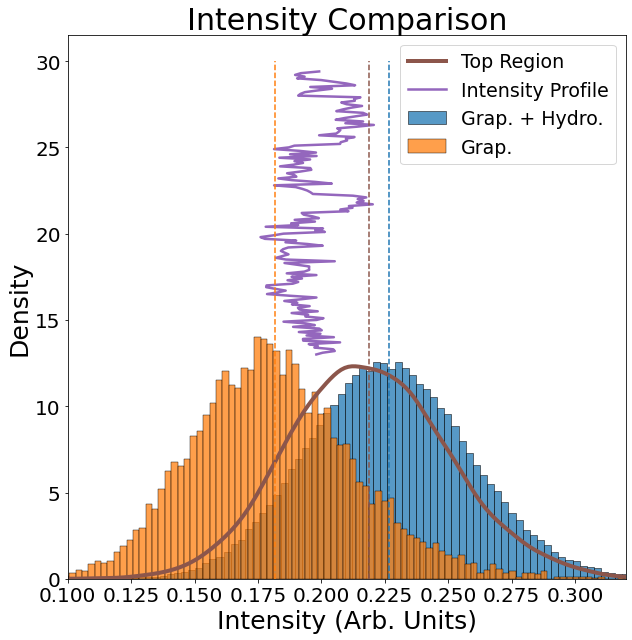

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10), facecolor='white')
palette = sns.color_palette()
sns.histplot(selection1, ax=ax, color=palette[0], label='Grap. + Hydro.', stat='density', bins=100)
sns.histplot(selection2, ax=ax, color=palette[1], label='Grap.', stat='density', bins=100)
sns.kdeplot(selection3, ax=ax, color=palette[5], label='Top Region', linewidth=4)

# Generate dummy x-values for the line plot
x_values = np.arange(len(line))/10 + 13

# Plot line plot
sns.lineplot(x=line, y=x_values, ax=ax, color=palette[4], label='Intensity Profile', sort=False, linewidth=2.5)
ax.set_title('Intensity Comparison', fontsize=30)
ax.legend(fontsize=19)
ax.vlines(np.mean(selection1), ymin=0, ymax=30, color=palette[0], linestyles='dashed')
ax.vlines(np.mean(selection2), ymin=0, ymax=30, color=palette[1], linestyles='dashed')
ax.vlines(np.mean(selection3), ymin=0, ymax=30, color=palette[5], linestyles='dashed')
ax.set_xlim(0.1, 0.32)
plt.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Intensity (Arb. Units)', fontsize=25)
ax.set_ylabel('Density', fontsize=25)

# save
plt.savefig('Output/Intensity Comparison.svg', bbox_inches='tight')
plt.savefig('Output/Intensity Comparison.png', bbox_inches='tight', dpi=300)

plt.show()

## Image 2
Now let's perform a similar analysis on the other image

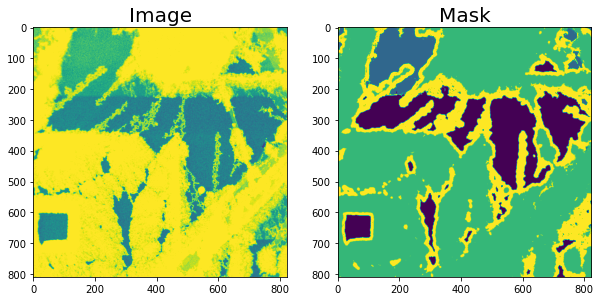

In [18]:
fname = 'Data/SuperScan (MAADForABF) 9_no-gamma_cropped2.tif'
mask_name = 'Data/SuperScan (MAADForABF) 9_no-gamma_cropped2_classified.tif'

image = np.array(Image.open(fname))
mask = np.array(Image.open(mask_name))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,20), facecolor='white')

ax[0].imshow(image)
ax[0].set_title('Image', fontsize=20)

ax[1].imshow(mask)
ax[1].set_title('Mask', fontsize=20)
plt.show()

We want to select a few areas and extract the intensities from the image for these regions.

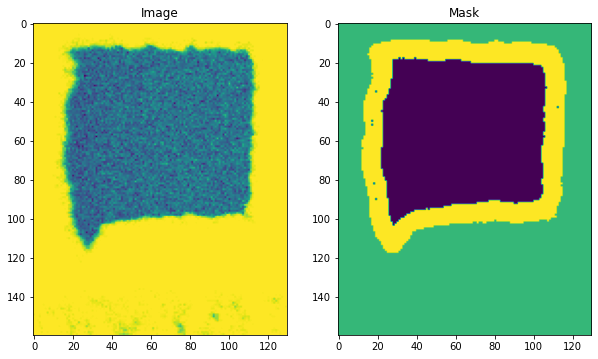

In [19]:
# crop to this y-value
y1 = 590
y2 = 750

# crop to this x-value
x1 = 0
x2 = 130

cropped_image = image[y1:y2,x1:x2]
cropped_mask = mask[y1:y2,x1:x2]

# plot the pair
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,20), facecolor='white')
ax[0].imshow(cropped_image)
ax[0].set_title('Image')
ax[1].imshow(cropped_mask)
ax[1].set_title('Mask')

plt.show()

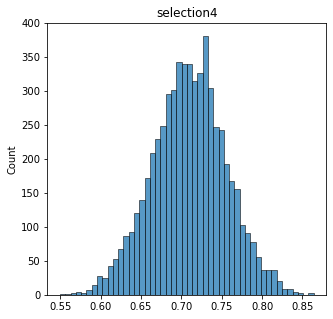

In [20]:
selection4 = cropped_image[cropped_mask == 0]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), facecolor='white')
sns.histplot(selection4, ax=ax)
ax.set_title('selection4')
plt.show()

New area

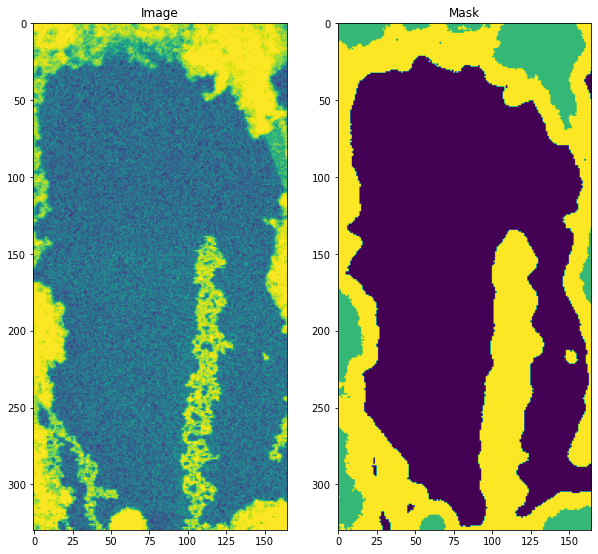

In [21]:
# crop to this y-value
y1 = 200
y2 = 530

# crop to this x-value
x1 = 485
x2 = 650

cropped_image = image[y1:y2,x1:x2]
cropped_mask = mask[y1:y2,x1:x2]

# plot the pair
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,20), facecolor='white')
ax[0].imshow(cropped_image)
ax[0].set_title('Image')
ax[1].imshow(cropped_mask)
ax[1].set_title('Mask')

plt.show()

Select the dark purple area

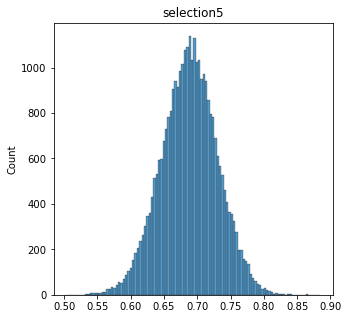

In [22]:
selection5 = cropped_image[cropped_mask == 0]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), facecolor='white')
sns.histplot(selection5, ax=ax)
ax.set_title('selection5')
plt.show()

New area

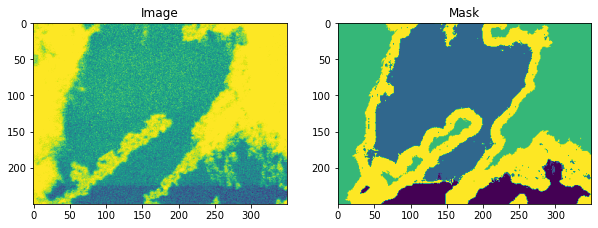

In [23]:
# crop to this y-value
y1 = 0
y2 = 250

# crop to this x-value
x1 = 50
x2 = 400

cropped_image = image[y1:y2,x1:x2]
cropped_mask = mask[y1:y2,x1:x2]

# plot the pair
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,20), facecolor='white')
ax[0].imshow(cropped_image)
ax[0].set_title('Image')
ax[1].imshow(cropped_mask)
ax[1].set_title('Mask')

plt.show()

Select the blue area

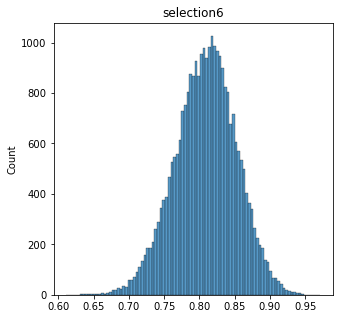

In [24]:
selection6 = cropped_image[cropped_mask == 1]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), facecolor='white')
sns.histplot(selection6, ax=ax)
ax.set_title('selection6')
plt.show()

Show the density plot comparison

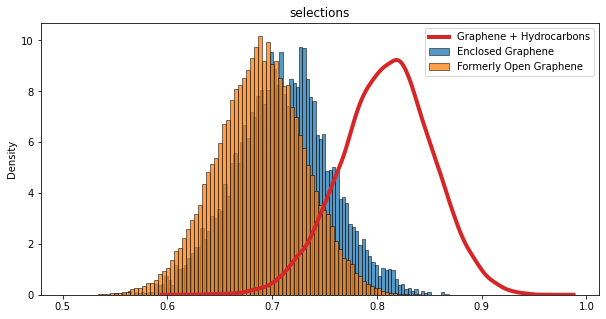

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5), facecolor='white')
palette = sns.color_palette()
sns.histplot(selection4, ax=ax, color=palette[0], label='Enclosed Graphene', stat='density', bins=100)
sns.histplot(selection5, ax=ax, color=palette[1], label='Formerly Open Graphene', stat='density', bins=100)
#sns.histplot(selection3, ax=ax, color=palette[2], label='Unknown', stat='density', bins=100, kde=True)
sns.kdeplot(selection6, ax=ax, color=palette[3], label='Graphene + Hydrocarbons', linewidth=4) # Probably don't need a line for this one
ax.set_title('selections')
ax.legend()
plt.show()

Let's do another line profile

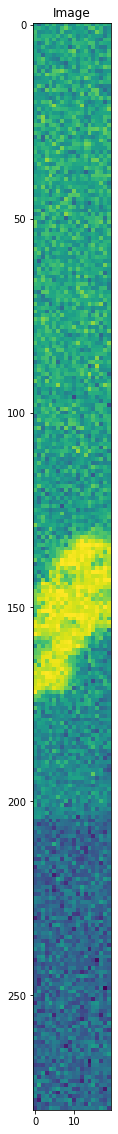

In [26]:
# crop to this y-value
y1 = 20
y2 = 300

# crop to this x-value
x1 = 170
x2 = 190

cropped_image = image[y1:y2,x1:x2]
cropped_mask = mask[y1:y2,x1:x2]

# plot the pair
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,20), facecolor='white')
ax.imshow(cropped_image)
ax.set_title('Image')

plt.show()

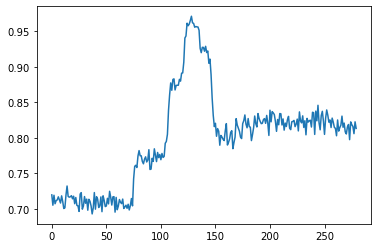

In [27]:
line = np.mean(cropped_image, axis=1)
# reverse the direction
line = line[::-1]
plt.plot(line)
plt.show()

Show the comparison of the density plots and line profile together in the same figure.

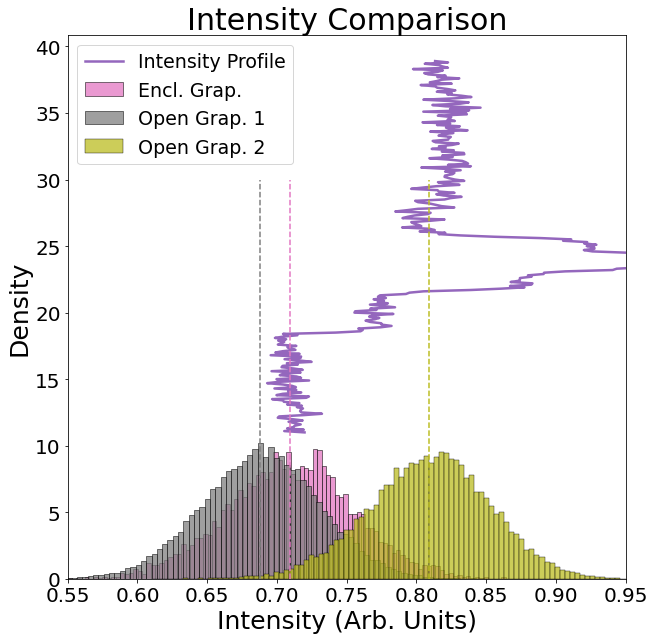

In [28]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10), facecolor='white')
palette = sns.color_palette()
sns.histplot(selection4, ax=ax, color=palette[6], label='Encl. Grap.', stat='density', bins=100)
sns.histplot(selection5, ax=ax, color=palette[7], label='Open Grap. 1', stat='density', bins=100)
#sns.kdeplot(selection6, ax=ax, color=palette[3], label='Open Grap. 2', linewidth=4)
sns.histplot(selection6, ax=ax, color=palette[8], label='Open Grap. 2', stat='density', bins=100)

# Generate dummy x-values for the line plot
x_values = np.arange(len(line))/10 + 11

# Plot line plot
sns.lineplot(x=line, y=x_values, ax=ax, color=palette[4], label='Intensity Profile', sort=False, linewidth=2.5)
ax.set_title('Intensity Comparison', fontsize=30)
ax.legend(fontsize=19)
ax.vlines(np.mean(selection4), ymin=0, ymax=30, color=palette[6], linestyles='dashed')
ax.vlines(np.mean(selection5), ymin=0, ymax=30, color=palette[7], linestyles='dashed')
ax.vlines(np.mean(selection6), ymin=0, ymax=30, color=palette[8], linestyles='dashed')
ax.set_xlim(0.55, 0.95)
plt.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Intensity (Arb. Units)', fontsize=25)
ax.set_ylabel('Density', fontsize=25)

# save
plt.savefig('Output/Intensity Comparison2.svg', bbox_inches='tight')
plt.savefig('Output/Intensity Comparison2.png', bbox_inches='tight', dpi=300)

plt.show()

# Supplemental Figure

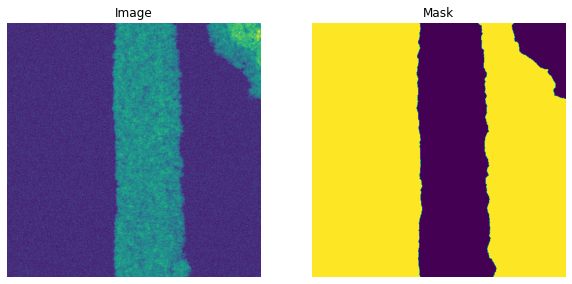

In [29]:
fname = 'Data/Recording of SuperScan (MAADForABF)5_frame1.tif'
mask_name = 'Data/Recording of SuperScan (MAADForABF)5_frame1_mask.tif'

image = np.array(Image.open(fname))
mask = np.array(Image.open(mask_name))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10), facecolor='white')
ax[0].imshow(image)
ax[0].set_title('Image')
ax[0].set_axis_off()

ax[1].imshow(mask)
ax[1].set_title('Mask')
ax[1].set_axis_off()

plt.show()

We want to compare the intensity on the left and right hand sides of the barrier in the middle. We need to select each region.

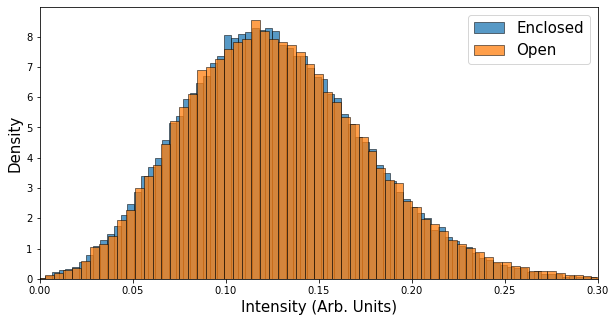

In [30]:
# left
left = image[:,0:300]
left_mask = mask[:,0:300]
left_intensity = left[left_mask == 1]

# right
right = image[:,300:]
right_mask = mask[:,300:]
right_intensity = right[right_mask == 1]

# plot the comparison
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), facecolor='white')
sns.histplot(left_intensity, ax=ax, color=palette[0], label='Enclosed', stat='density', bins=100)
sns.histplot(right_intensity, ax=ax, color=palette[1], label='Open', stat='density', bins=100)
ax.set_xlim((0, 0.3))
ax.set_xlabel('Intensity (Arb. Units)', fontsize=15)
ax.set_ylabel('Density', fontsize=15)
ax.legend(fontsize=15)

# save figure
plt.savefig('Output/SI_histogram_comparison.svg', bbox_inches='tight')
plt.savefig('Output/SI_histogram_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

There is no intensity difference between the two sides.